## Observations and Insights 

In [323]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [324]:
# Checking the number of mice.
n_mice_df = len(mouse_study['Mouse ID'].unique())
n_mice_df

249

In [325]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_boolean = mouse_study.duplicated(['Mouse ID','Timepoint'])
duplicate_mouse = mouse_study[duplicate_mouse_boolean]['Mouse ID']
duplicate_mouse 

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [326]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study[duplicate_mouse_boolean]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [327]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_boolean = mouse_study['Mouse ID'] != 'g989'
clean_mouse_study =  mouse_study[clean_mouse_study_boolean]
clean_mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [328]:
# Checking the number of mice in the clean DataFrame.
clean_n_mouse = len(clean_mouse_study['Mouse ID'].unique())
clean_n_mouse

248

## Summary Statistics

In [329]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats_group = clean_mouse_study.groupby('Drug Regimen')
tumor_stats = tumor_stats_group[['Drug Regimen','Tumor Volume (mm3)']]
tumor_stats_summary = tumor_stats.mean().rename(columns = {'Tumor Volume (mm3)':'mean'})
tumor_stats_summary['median'] = tumor_stats.median()
tumor_stats_summary['variance'] = tumor_stats.var()
tumor_stats_summary['standard deviation'] = tumor_stats.std()
tumor_stats_summary['SEM'] = tumor_stats.sem()

tumor_stats_df = pd.DataFrame([{'mean' : tumor_stats_mean, 
                               'median' : tumor_stats_median, 
                               'variance' : tumor_stats_var,
                               'standard deviation' : tumor_stats_std,
                               'SEM' : tumor_stats_sem}])
tumor_stats_summary


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [330]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_stats_summary_2 = tumor_stats.agg(['mean' , 'median', 'var' , 'std' , 'sem' ])
tumor_stats_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

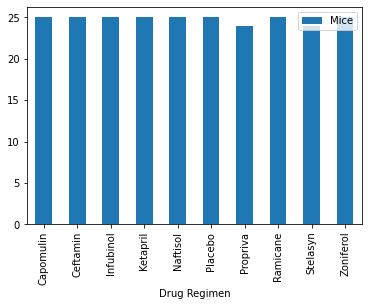

In [331]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_regimen_grouby = clean_mouse_study.groupby(['Drug Regimen'])
unique_mice = unique_mice_regimen_grouby['Mouse ID'].nunique()
unique_mice_df = pd.DataFrame(unique_mice).rename(columns = {'Mouse ID' : 'Mice'})
unique_mice_plot = unique_mice_df.plot.bar()

Text(0, 0.5, 'Unique Number Mice')

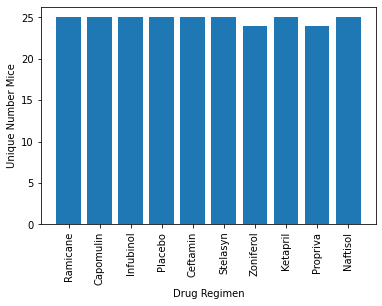

In [332]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_axis_bar = clean_mouse_study['Drug Regimen'].unique()
x_axis_bar = np.arange(len(drug_axis_bar))
y_axis_bar = unique_mice.values.tolist()
plt.bar(x_axis_bar, y_axis_bar)
tick_locations = [x for x in x_axis_bar]
plt.xticks(tick_locations,drug_axis_bar,rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Unique Number Mice')

<AxesSubplot:ylabel='Sex'>

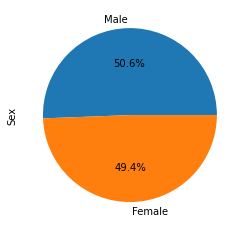

In [333]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_df = mouse_study['Sex'].value_counts()
mf_df.plot(kind = 'pie',autopct='%1.1f%%')

Text(0.5, 1.0, 'Sex')

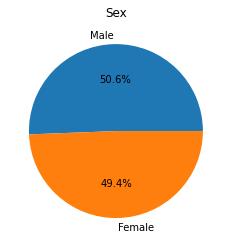

In [334]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_study['Sex'].unique().tolist()
plt.pie(mf_df,autopct="%1.1f%%", labels = labels)
plt.title('Sex')

## Quartiles, Outliers and Boxplots

In [335]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = mouse_study.groupby('Mouse ID')
g_time = mouse_df['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
g_time_mouse = pd.merge(mouse_study, g_time, on = ('Mouse ID','Timepoint'), how = 'right')
g_time_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [396]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_raw = [treatment for treatment in drug_axis_bar]
treatments = []

for treatment in treatments_raw:
    if   treatment == "Capomulin":
         treatments.append(treatment)
    elif treatment == "Ramicane":
         treatments.append(treatment)
    elif treatment == "Infubinol":
         treatments.append(treatment)
    elif treatment == "Ceftamin":
         treatments.append(treatment)
    
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_Capomulin = []
tumor_vol_Ramicane = []
tumor_vol_Infubinol = []
tumor_vol_Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# Capomulin

Capomulin_mice = g_time_mouse.loc[g_time_mouse['Drug Regimen'] == 'Capomulin']
for tumor in Capomulin_mice['Tumor Volume (mm3)']:
    tumor_vol_Capomulin.append(tumor)
tumor_vol_Capomulin_df = pd.DataFrame(tumor_vol_Capomulin)

quartiles_Capomulin = tumor_vol_Capomulin_df.quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin.iloc[0,0]
upperq_Capomulin = quartiles_Capomulin.iloc[2,0]

IQR_Capomulin = upperq_Capomulin - lowerq_Capomulin

lower_bound_Capomulin = lowerq_Capomulin - (1.5*IQR_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*IQR_Capomulin)

print('Tumor volumes below ' + str(lower_bound_Capomulin) + ' with Capomulin may be outliers')
print('Tumor volumes above ' + str(upper_bound_Capomulin) + ' with Capomulin may be outliers')

# Ramicane

Ramicane_mice = g_time_mouse.loc[g_time_mouse['Drug Regimen'] == 'Ramicane']
for tumor in Ramicane_mice['Tumor Volume (mm3)']:
    tumor_vol_Ramicane.append(tumor)
tumor_vol_Ramicane_df = pd.DataFrame(tumor_vol_Ramicane)

quartiles_Ramicane = tumor_vol_Ramicane_df.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane.iloc[0,0]
upperq_Ramicane = quartiles_Ramicane.iloc[2,0]

IQR_Ramicane = upperq_Ramicane - lowerq_Ramicane

lower_bound_Ramicane = lowerq_Ramicane - (1.5*IQR_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*IQR_Ramicane)

print('Tumor volumes below ' + str(lower_bound_Ramicane) + ' with Ramicane may be outliers')
print('Tumor volumes above ' + str(upper_bound_Ramicane) + ' with Ramicane may be outliers')

# Infubinol

Infubinol_mice = g_time_mouse.loc[g_time_mouse['Drug Regimen'] == 'Infubinol']
for tumor in Infubinol_mice['Tumor Volume (mm3)']:
    tumor_vol_Infubinol.append(tumor)
tumor_vol_Infubinol_df = pd.DataFrame(tumor_vol_Infubinol)

quartiles_Infubinol = tumor_vol_Infubinol_df.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol.iloc[0,0]
upperq_Infubinol = quartiles_Infubinol.iloc[2,0]

IQR_Infubinol = upperq_Infubinol - lowerq_Infubinol

lower_bound_Infubinol = lowerq_Infubinol - (1.5*IQR_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*IQR_Infubinol)

print('Tumor volumes below ' + str(lower_bound_Infubinol) + ' with Infubinol may be outliers')
print('Tumor volumes above ' + str(upper_bound_Infubinol) + ' with Infubinol may be outliers')

# Ceftamin

Ceftamin_mice = g_time_mouse.loc[g_time_mouse['Drug Regimen'] == 'Ceftamin']
for tumor in Ceftamin_mice['Tumor Volume (mm3)']:
    tumor_vol_Ceftamin.append(tumor)
tumor_vol_Ceftamin_df = pd.DataFrame(tumor_vol_Ceftamin)

quartiles_Ceftamin = tumor_vol_Ceftamin_df.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin.iloc[0,0]
upperq_Ceftamin = quartiles_Ceftamin.iloc[2,0]

IQR_Ceftamin = upperq_Ceftamin - lowerq_Ceftamin

lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*IQR_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*IQR_Ceftamin)

print('Tumor volumes below ' + str(lower_bound_Ceftamin) + ' with Ceftamin may be outliers')
print('Tumor volumes above ' + str(upper_bound_Ceftamin) + ' with Ceftamin may be outliers')

treatments

Tumor volumes below 20.70456164999999 with Capomulin may be outliers
Tumor volumes above 51.83201549 with Capomulin may be outliers
Tumor volumes below 17.912664470000003 with Ramicane may be outliers
Tumor volumes above 54.30681135 with Ramicane may be outliers
Tumor volumes below 36.83290494999999 with Infubinol may be outliers
Tumor volumes above 82.74144559000001 with Infubinol may be outliers
Tumor volumes below 25.355449580000002 with Ceftamin may be outliers
Tumor volumes above 87.66645829999999 with Ceftamin may be outliers


['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

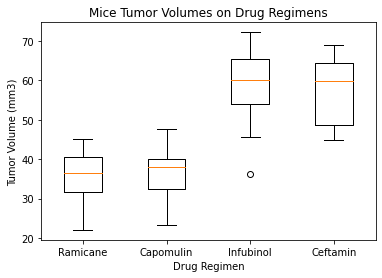

In [397]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vols = [tumor_vol_Ramicane, tumor_vol_Capomulin, tumor_vol_Infubinol, tumor_vol_Ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Mice Tumor Volumes on Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vols, vert=True, labels = treatments)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse ID: s185')

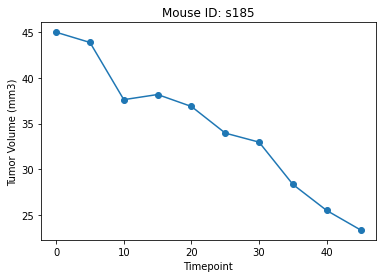

In [416]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mice = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']
Capomulin_mouse = Capomulin_mice[Capomulin_mice['Mouse ID'] == 's185']
x_axis_mouse = Capomulin_mouse['Timepoint']
y_axis_mouse = Capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_axis_mouse, y_axis_mouse, marker = 'o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse ID: s185')

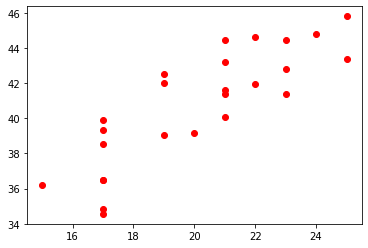

In [447]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_group = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin',:]
Capomulin_mice_group = Capomulin_group.groupby('Mouse ID').mean()
x_axis_mice = Capomulin_mice_group['Weight (g)']
y_axis_mice = Capomulin_mice_group['Tumor Volume (mm3)']
plt.scatter(x_axis_mice, y_axis_mice, c = 'r')

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
